In [2]:
# Imports
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

Cargamos el dataset obtenido durante la limpieza de datos.

In [4]:
df=pd.read_csv('/content/Data_Clean.csv')

In [8]:
df

,Unnamed: 0,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,0,Wednesday,19,Visa,Tap,5.0,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,False
1,1,Wednesday,17,MasterCard,PIN,288.0,POS,Services,USA,USA,USA,F,49.6,Lloyds,False
2,2,Wednesday,14,Visa,Tap,5.0,POS,Restaurant,India,India,India,F,42.2,Barclays,False
3,3,Tuesday,14,Visa,Tap,28.0,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,False
4,4,Tuesday,23,Visa,CVC,91.0,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99946,99946,Tuesday,22,MasterCard,Tap,15.0,POS,Electronics,United Kingdom,United Kingdom,United Kingdom,F,53.8,Halifax,False
99947,99947,Wednesday,23,MasterCard,PIN,7.0,ATM,Children,Russia,Russia,Russia,M,45.0,Barclays,False
99948,99948,Tuesday,11,MasterCard,PIN,21.0,ATM,Subscription,United Kingdom,United Kingdom,United Kingdom,F,46.5,HSBC,False
99949,99949,Wednesday,22,Visa,Tap,25.0,POS,Products,United Kingdom,United Kingdom,United Kingdom,M,48.2,Barclays,False


In [14]:
df=df.drop('Unnamed: 0', axis=1)

In [15]:
df

,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,Wednesday,19,Visa,Tap,5.0,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,False
1,Wednesday,17,MasterCard,PIN,288.0,POS,Services,USA,USA,USA,F,49.6,Lloyds,False
2,Wednesday,14,Visa,Tap,5.0,POS,Restaurant,India,India,India,F,42.2,Barclays,False
3,Tuesday,14,Visa,Tap,28.0,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,False
4,Tuesday,23,Visa,CVC,91.0,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99946,Tuesday,22,MasterCard,Tap,15.0,POS,Electronics,United Kingdom,United Kingdom,United Kingdom,F,53.8,Halifax,False
99947,Wednesday,23,MasterCard,PIN,7.0,ATM,Children,Russia,Russia,Russia,M,45.0,Barclays,False
99948,Tuesday,11,MasterCard,PIN,21.0,ATM,Subscription,United Kingdom,United Kingdom,United Kingdom,F,46.5,HSBC,False
99949,Wednesday,22,Visa,Tap,25.0,POS,Products,United Kingdom,United Kingdom,United Kingdom,M,48.2,Barclays,False


Iniciamos el análisis encontrando la cantidad de fraudes en relación a no Fraudes en el data set.

In [53]:
fraud_percentage=df.groupby('Fraud')['Day of Week'].count()
total_fraudNoFraud=fraud_percentage.sum()
fraud_percentage=fraud_percentage/total_fraudNoFraud

Text(0.5, 1.0, 'percentage')

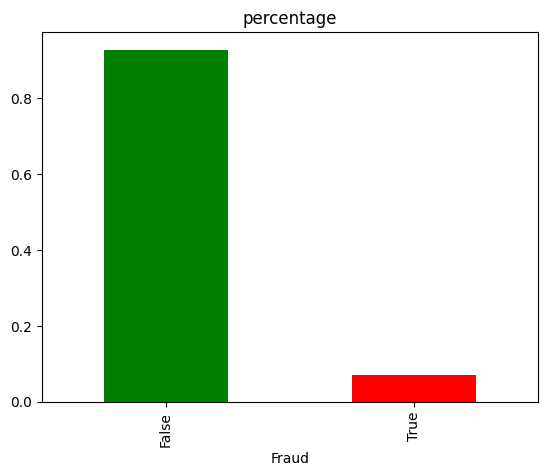

In [67]:
ax=fraud_percentage.plot.bar(x='Fraud',color=['green','red'])
ax.set_title('percentage')

In [65]:
fraud_percentage

Fraud
False    0.928075
True     0.071925
Name: Day of Week, dtype: float64

Aproximadamente 7.2% de las transacciones en el data set resultaron en fraude.

Enfocandonos primero en las relaciones entre fraudes y el resto de variables categóricas.

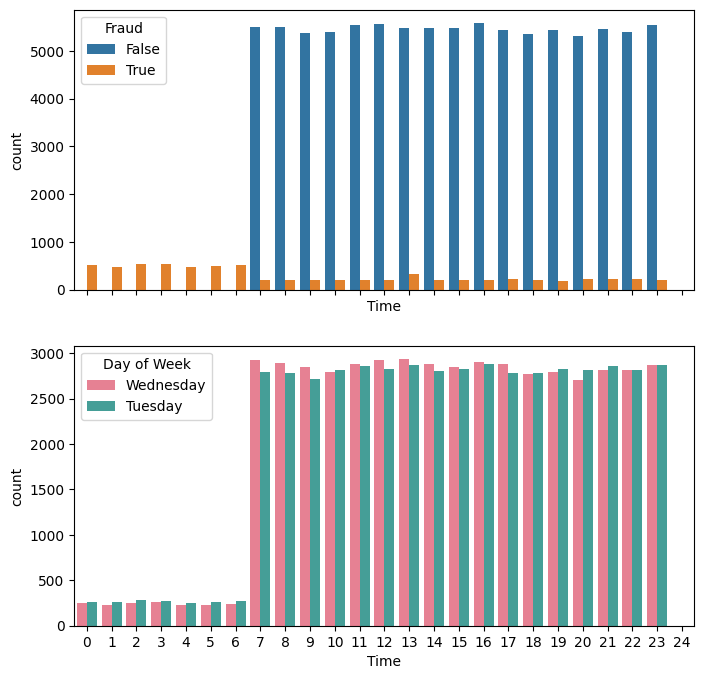

In [128]:
fig, axes = plt.subplots(2,1, figsize=(8,8), sharex=True)
time=sns.countplot(x=df['Time'], hue=df['Fraud'], ax=axes[0])
day_time=sns.countplot(x=df['Time'], hue=df['Day of Week'], ax=axes[1], palette='husl')

[Text(0, 0, 'Entertainment'),
 Text(1, 0, 'Services'),
 Text(2, 0, 'Restaurant'),
 Text(3, 0, 'Electronics'),
 Text(4, 0, 'Children'),
 Text(5, 0, 'Fashion'),
 Text(6, 0, 'Food'),
 Text(7, 0, 'Products'),
 Text(8, 0, 'Subscription'),
 Text(9, 0, 'Gaming')]

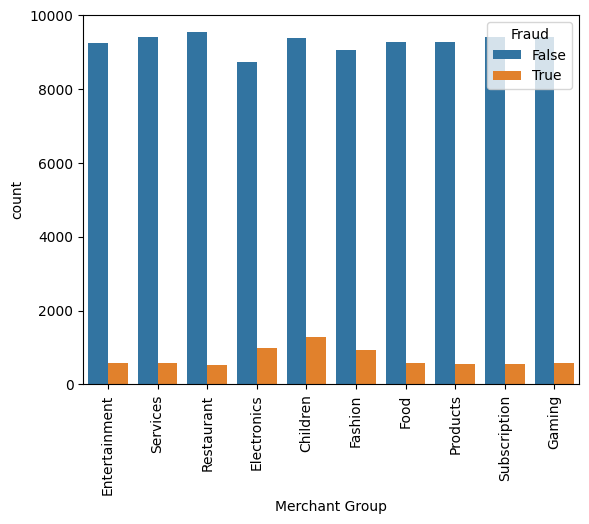

In [83]:
ax=sns.countplot(x=df['Merchant Group'], hue=df['Fraud'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

<Axes: xlabel='Age', ylabel='Amount'>

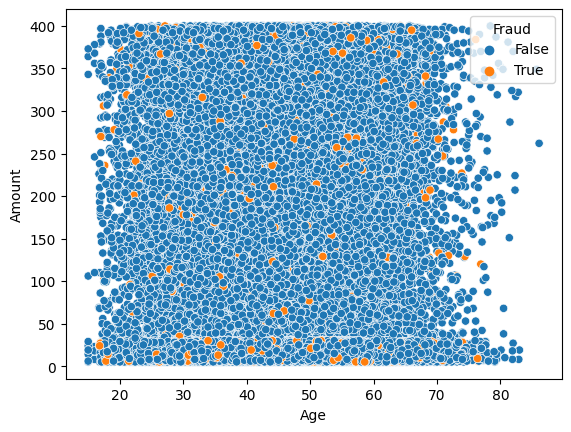

In [118]:
sns.scatterplot(x=df['Age'], y=df['Amount'], hue=df['Fraud'])

El scatter plot de arriba es ilegible, una mejor idea sería emplear un jointplot.

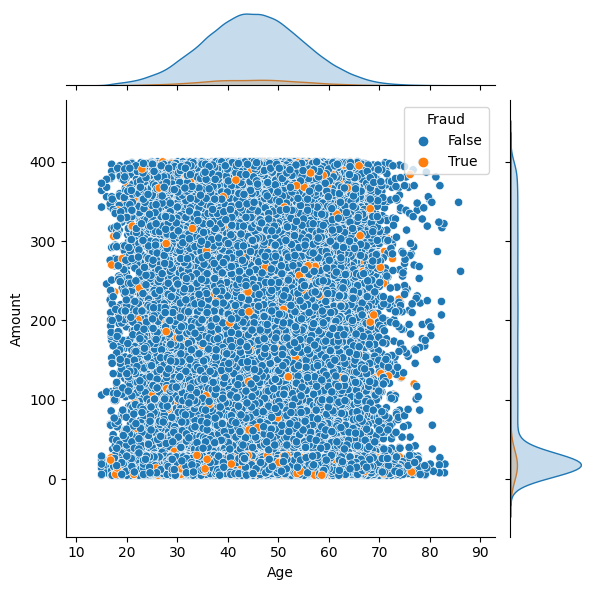

In [123]:
sns.jointplot(x=df['Age'], y=df['Amount'], hue=df['Fraud']);


In [134]:
df['Amount'].median()

30.0

In [135]:
df['Age'].mean()

44.99419915758723

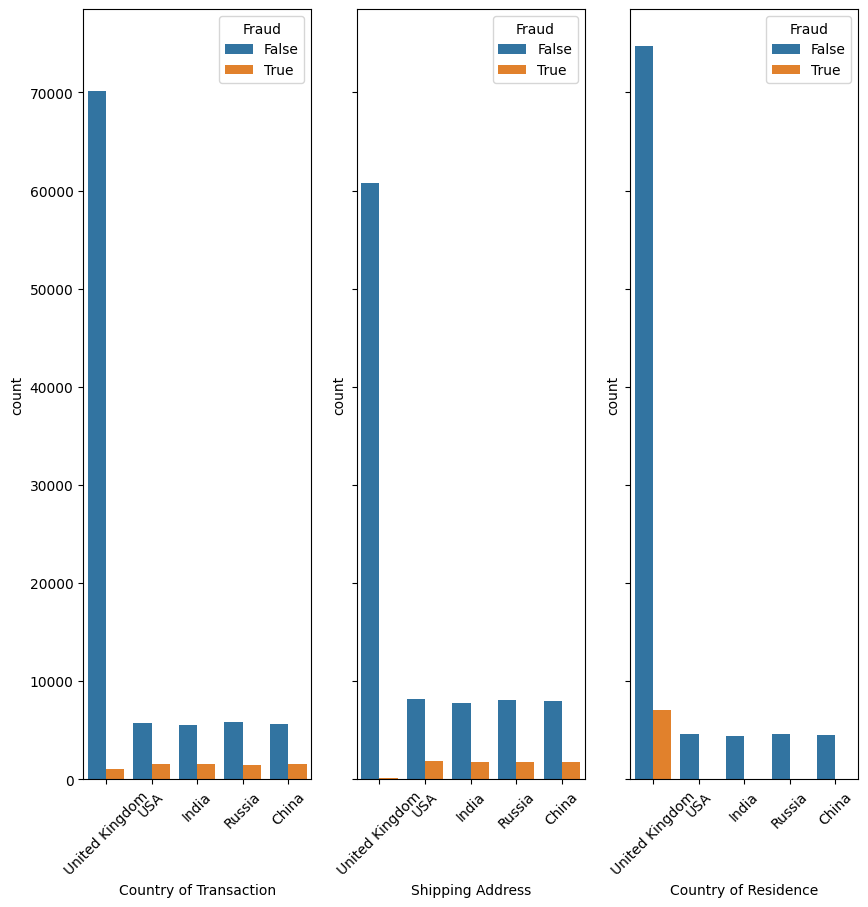

In [127]:
fig, axes = plt.subplots(1,3, figsize=(10,10), sharey=True)
transaction=sns.countplot(x=df['Country of Transaction'], hue=df['Fraud'],ax=axes[0])
transaction.set_xticklabels(transaction.get_xticklabels(), rotation=45)
shipping=sns.countplot(x=df['Shipping Address'], hue=df['Fraud'],ax=axes[1])
shipping.set_xticklabels(shipping.get_xticklabels(), rotation=45)
residence=sns.countplot(x=df['Country of Residence'], hue=df['Fraud'], ax=axes[2])
residence.set_xticklabels(residence.get_xticklabels(), rotation=45)
ax.tick_params(axis='x', labelrotation = 100)

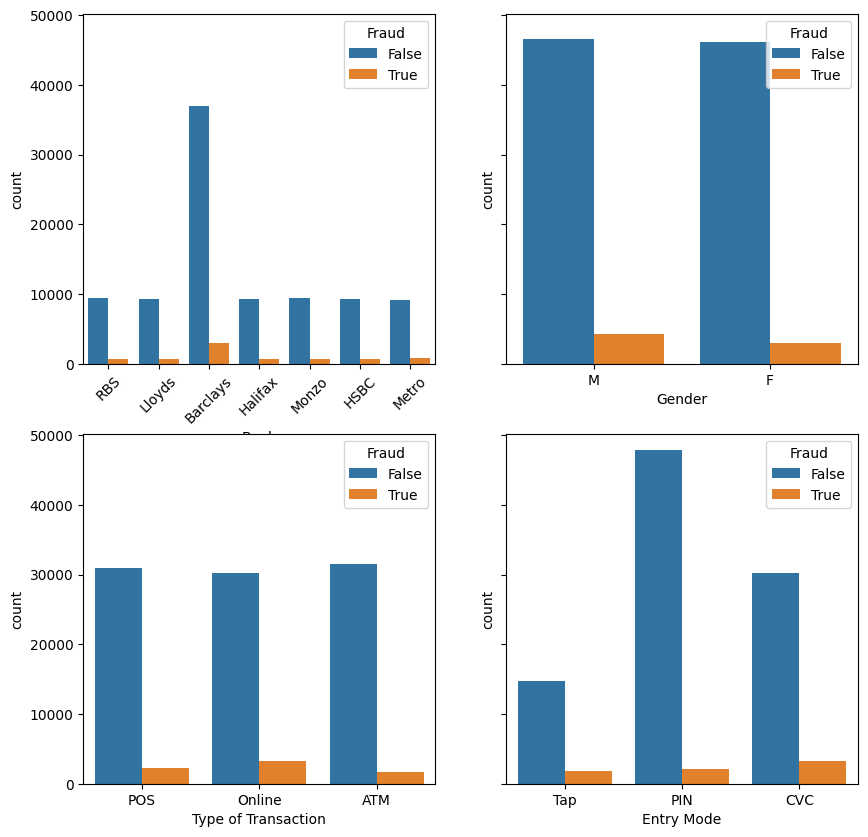

In [132]:
fig, axes = plt.subplots(2,2, figsize=(10,10), sharey=True)
bank=sns.countplot(x=df['Bank'], hue=df['Fraud'],ax=axes[0,0])
bank.set_xticklabels(bank.get_xticklabels(), rotation=45)
gender=sns.countplot(x=df['Gender'], hue=df['Fraud'],ax=axes[0,1])
transactionType=sns.countplot(x=df['Type of Transaction'], hue=df['Fraud'],ax=axes[1,0])
entryMode=sns.countplot(x=df['Entry Mode'], hue=df['Fraud'],ax=axes[1,1])

De las comparaciones arriba mostradas, es importante comentar acerca de los puntos siguientes:


*   Las transacciones están distribuidas uniformemente a lo largo de las horas de ambos días
*   Un punto crítico es el hecho de que las transacciones fraudulentas son ampliamente superiores a las no fraudulentas entre las 0 y 6 hrs del día. Esto revela que la hora del día es determinante de fraude, o que los datos contienen un error; en lo que procede se optará por la segunda opción.
* La categoría de niños presenta mayor índice de fraude, aunque no dramaticamente dispar al resto de tipos de mercancía.
* La edad está distribuida casi normalmente centrada en los 45 años de edad, mientras que los fraudes por edad corresponden a una gráfica con una variancia muy grande, casi uniforme.

  Las transacciones son en general de baja denominación, de la gráfica se puede apreciar una mediana de 30 libras. Sin embargo, la variancia es amplia.
* En cuanto a la categoría de países, note que, fuera de la predominancia de UK a la que nos referímos en la limpieza, los fraudes en países de residencia ajenos a UK son inexistentes.
* Finalmente, podemos encontrar una distribución uniforme entre el género, tipo de transacción, y tipo de entrada de seguridad.


Ahora, podemos analizar el data set con el objetivo de reconocimiento del segmento demográfico con el cual estamos tratando.


Dada la basta cantidad de datos, Binning hexagonales serán preferidos sobre scatterplots.

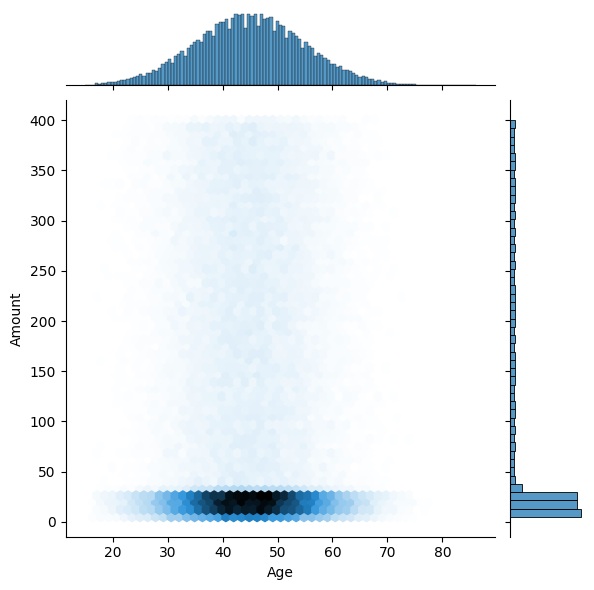

In [122]:
sns.jointplot(x=df['Age'], y=df['Amount'], kind='hex', ratio=5, joint_kws={'gridsize': 50});


<Axes: xlabel='Age', ylabel='Count'>

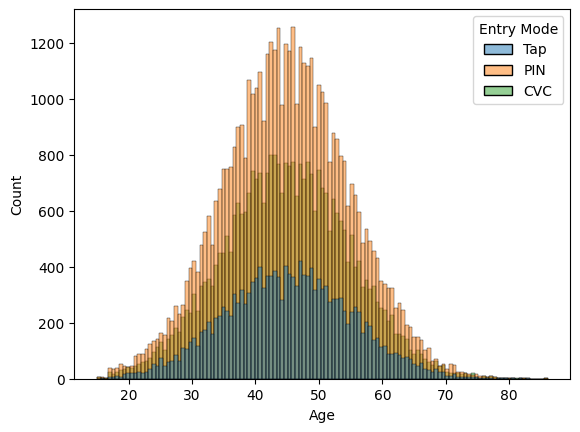

In [149]:
sns.histplot(x=df['Age'], hue=df['Entry Mode'], )

[Text(0, 0, 'Entertainment'),
 Text(1, 0, 'Services'),
 Text(2, 0, 'Restaurant'),
 Text(3, 0, 'Electronics'),
 Text(4, 0, 'Children'),
 Text(5, 0, 'Fashion'),
 Text(6, 0, 'Food'),
 Text(7, 0, 'Products'),
 Text(8, 0, 'Subscription'),
 Text(9, 0, 'Gaming')]

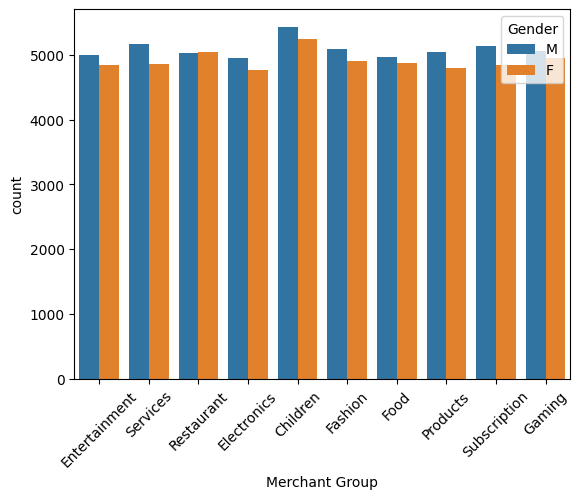

In [152]:
ax=sns.countplot(x=df['Merchant Group'], hue=df['Gender'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


<Axes: xlabel='Country of Transaction', ylabel='count'>

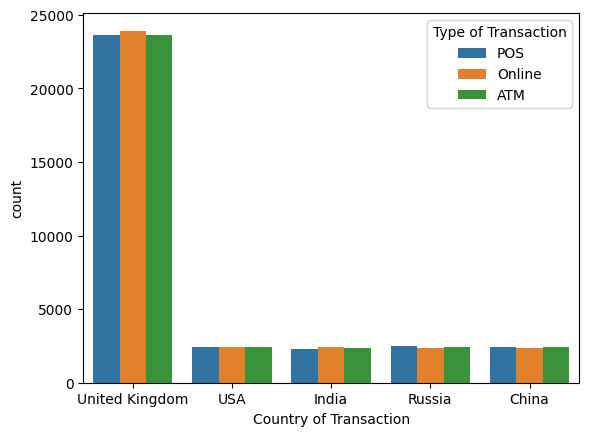

In [159]:
sns.countplot(x=df['Country of Transaction'], hue=df['Type of Transaction'])

<Axes: xlabel='Country of Transaction', ylabel='count'>

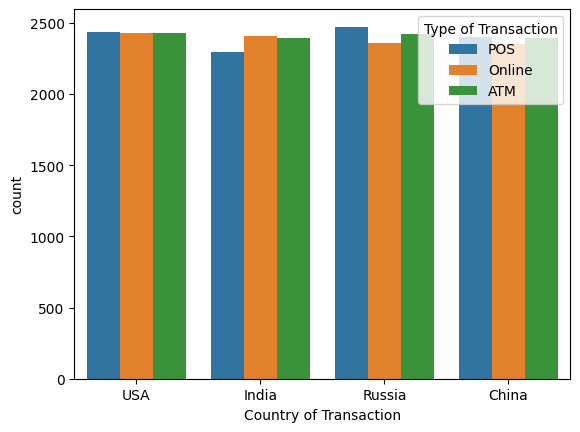

In [183]:
df_noUK=df.loc[df['Country of Transaction']!='United Kingdom']
sns.countplot(x=df_noUK['Country of Transaction'], hue=df_noUK['Type of Transaction'])

In [161]:
df_gender_amount=df.groupby('Gender')['Amount'].sum()
df_gender_amount

Gender
F    5528815.0
M    5723290.0
Name: Amount, dtype: float64

In [170]:
df_transaction_amount=df.groupby('Type of Transaction')['Amount', 'Fraud'].sum()
df_transaction_amount

<ipython-input-170-782a655ba7dd>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_transaction_amount=df.groupby('Type of Transaction')['Amount', 'Fraud'].sum()


,Amount,Fraud
Type of Transaction,,
ATM,3739394.0,1673
Online,3762757.0,3199
POS,3749954.0,2317


<Axes: xlabel='Gender', ylabel='count'>

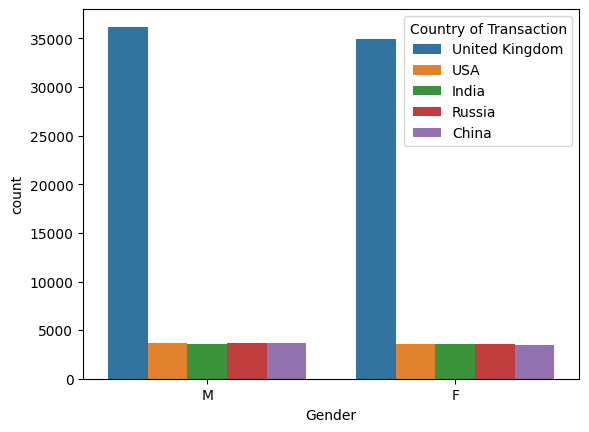

In [177]:
sns.countplot(x=df['Gender'], hue=df['Country of Transaction'])

Podría darse el caso que la presencia de la columna de UK no permita apreciar disparidades de género en los otros países. Por lo que podemos excluir dicho país de la gráfica.

<Axes: xlabel='Gender', ylabel='count'>

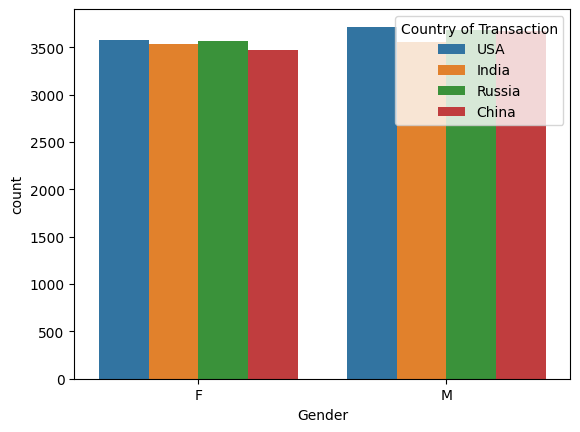

In [182]:
df_noUK=df.loc[df['Country of Transaction']!='United Kingdom']
sns.countplot(x=df_noUK['Gender'], hue=df_noUK['Country of Transaction'])

Del analísis demográfico podemos obtener las conclusiones siguientes:


*   Como se ha mencionado antes, las transacciones son predominantemente de baja denominación, por debajo de las 50 libras, y centradas alrededor de los 45 años de edad.
*   En cuanto al método de seguridad, existen semejanzas entre las distribuciones de las tres opciones en función de la edad. No así el máximo que presenta una preferencia por el método PIN, seguido del CVC, y finalmente el TAP.

  Se esperaba mayor frecuencia del TAP en sectores más jóvenes de la población, pero esto no fue encontrado.
* En cuanto a la disparidad de género, si bien las transacciones son con mayor frequencia realizadas por hombres, no existe una diferencia tan drámatica como podría esperarse. A pesar de comparar entre distintos países, la razón es de alrededor 50:50.

* En cuanto al tipo de transacción por país, si bien es aproximadamente uniforme, destaca el caso de una ligera escases de compras online en Rusia y China.
* Finalmente, los fraudes totales por compras online rebasan con creces a aquellas operaciones OPS y ATM fraudulentas, a pesar de tener una cantidad similar de capítal cada una de esas tres operaciones.

